# STEP-1 Understanding the business problem 

 ### Business Problem Statement
 #### -The bank wants to understand the key factors that influence loan approvals and rejections based on historical application data.By analyzingtrends across applicant demographics, income levels, credit history, and property area,the goal is to uncover insights that can help improvementbank’s loan approval policies and reduce financial risk.

### Project Requirements:- Dataset, Python, Numpy, Pandas, Seaborn, Matplotlib, Statistics
### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# STEP-2 Data Understanding 

In [2]:
df = pd.read_csv("Loan_Data.csv")
#pd.set_option("display.max.rows",None) all data showing
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
df.sample(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y
279,LP001908,Female,Yes,0,Not Graduate,No,4100,0.0,124.0,360.0,NaN,Rural,Y
486,LP002545,Male,No,2,Graduate,No,3547,0.0,80.0,360.0,0.0,Rural,N
62,LP001207,Male,Yes,0,Not Graduate,Yes,2609,3449.0,165.0,180.0,0.0,Rural,N


In [5]:
df.shape

(614, 13)

In [6]:
df.size

7982

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

#### conl: 
1. 'loan_ID' refers to the unique id of each Applicant
2. 'Gender' columns give the understanding the applicant is Male or Female
3. 'Married' its gives the info abount the Applicant is Married or Unmarried
4. 'Dependents' its give imfo abount his finacial is Dependents on how many people
5. 'Education' its give the infor the Applicant is Educated or Not
6. 'ApplicantIncome' its give the info abount Applicant Income 
8. 'CoapplicantIncome' its give info abount second person who taking responsibility so that person Income
9. 'LoanAmount'  its give the info abount for how much loan he asked to bank
10. 'Credit_History' its give the info abount the Applicant have Credit History or Not
11. 'Loan_Amount_Term' its give the info abount for how many monts he ask the Loan
12. 'Property_Area' its give info in which Area he lives and where is ihis Property
13. 'Loan_Status' its give info the Applicant Approve Loan or Not

# Data Exploration

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df['Loan_ID'].nunique()

614

##### Conl : Inside the Loan_ID column each value is unique its unnecessary - Drop it

In [11]:
df['Gender'].unique() 

array(['Male', 'Female', nan], dtype=object)

In [12]:
df['Gender'].nunique()

2

##### Conl : Gender column have some Null Values We have to replace it based on Mode & its a Categorical Column

In [13]:
df['Married'].unique() 

array(['No', 'Yes', nan], dtype=object)

In [14]:
df['Married'].nunique()  

2

##### Conl : Married Column have some Null Values We have to replace it based on Mode & its Categorical Column

In [15]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [16]:
df['Dependents'].nunique() 

4

##### Conl : The columns Values are Wrong Datatype along the Column Data type is wrong and Some Missing Values and its Discrete Count Column

In [17]:
df['Education'].unique()  

array(['Graduate', 'Not Graduate'], dtype=object)

In [18]:
df['Self_Employed'].unique() 

array(['No', 'Yes', nan], dtype=object)

##### conl : Null Values & its a Categorical Column 

In [19]:
df['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [20]:
df['ApplicantIncome'].nunique()

505

##### Conl : Its a Continuos Column

In [21]:
df['CoapplicantIncome'].nunique()

287

In [22]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [23]:
df['LoanAmount'].nunique() 

203

##### Conl: Its a Continuous Column

In [24]:
df['Loan_Amount_Term'].unique() 

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [25]:
df['Loan_Amount_Term'].nunique()

10

##### Conl: The Null Values and wrong datatype

In [26]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [27]:
df['Credit_History'].nunique() 

2

##### Conl:  1=Yes and 0=No replace the values and Null Values  & its a Categorical Values

In [28]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [29]:
df['Property_Area'].nunique()

3

##### Conl: Categorical Column

In [30]:
df['Loan_Status'].unique() 

array(['Y', 'N'], dtype=object)

In [31]:
df['Loan_Status'].nunique()

2

##### Conl: Categorical Column

Based on these Observation Do Modification

In [32]:
df['Credit_History'].replace({1:'Yes',0:'NO'},inplace=True)

Both Continuous Columns are showing same important based on that we concatenate those and create on Overall_Income Column

In [33]:
df['Overall_income'] = (df['ApplicantIncome'] + df['CoapplicantIncome'])
continuous = ['Overall_income','LoanAmount']
df.drop(columns = ['ApplicantIncome','CoapplicantIncome'],inplace = True)

Based on Data Exploration We Separate the Columns and defined their category

In [34]:
#Continuous Variable
continuous = ['Overall_income','LoanAmount']

#count variables
count = ['Dependents','Loan_Amount_Term']

#categorical variable
categorical = ['Gender','Married','Education','Self_Employed','Credit_History','Property_Area',	'Loan_Status']


In [35]:
df.describe()

,LoanAmount,Loan_Amount_Term,Overall_income
count,592.000000,600.00000,614.000000
mean,146.412162,342.00000,7024.705081
std,85.587325,65.12041,6458.663872
min,9.000000,12.00000,1442.000000
25%,100.000000,360.00000,4166.000000
50%,128.000000,360.00000,5416.500000
75%,168.000000,360.00000,7521.750000
max,700.000000,480.00000,81000.000000


In [36]:
df.isnull().sum()

Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Overall_income       0
dtype: int64

##### Conl : Multiple columns have nullvalues

In [37]:
df.duplicated().sum()

np.int64(0)

##### Conl: No Duplicated in Dataset

<Axes: ylabel='LoanAmount'>

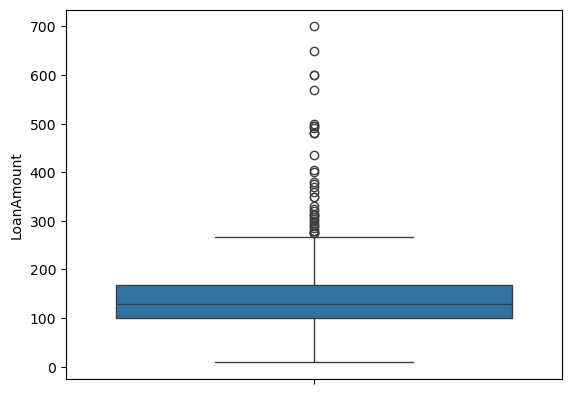

In [38]:
sns.boxplot(df['LoanAmount'])

<Axes: ylabel='Overall_income'>

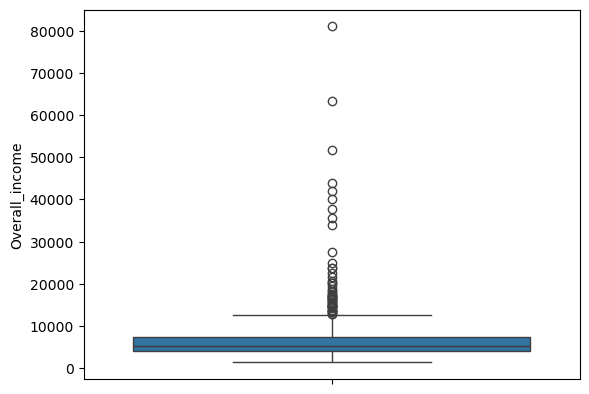

In [39]:
sns.boxplot(df['Overall_income'])

##### Conl : In huge Amount the Outliers are present in Applicant income column

In [40]:
df[continuous].skew()

Overall_income    5.633449
LoanAmount        2.677552
dtype: float64

##### Conl : The Data is Right Skewed

# STEP3 DATA PREPARATION

#### Replace the Wrong data

In [41]:
df['Dependents'].replace({"3+":3},inplace=True)

#### Treat Missing Values

In [42]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']= df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

df = df.dropna()

##### Conl: We cant replace other columns values so we Drop the Values becuse these columns are higly related to our business problem

In [43]:
df.isnull().sum()

Loan_ID             0
Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Overall_income      0
dtype: int64

#### Treat Wrong Data Type

In [44]:
df['Dependents'] = df['Dependents'].astype('int')
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('int')

#### Treating The Outliers

##### Conl : We Retrain the Outliers we are not modifying The outliers identified in the dataset are genuine and represent valid observationsrather than data entry or measurement errors.

#### Drop the Unimportant Column

In [45]:
df.drop(columns = ['Loan_ID'],inplace=True)

##### Conl: Afte the Cleaning part the Dataset is look well structed

In [46]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Overall_income
1,Male,Yes,1,Graduate,No,128.0,360,Yes,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360,Yes,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360,Yes,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360,Yes,Urban,Y,6000.0
5,Male,Yes,2,Graduate,Yes,267.0,360,Yes,Urban,Y,9613.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360,Yes,Rural,Y,2900.0
610,Male,Yes,3,Graduate,No,40.0,180,Yes,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,253.0,360,Yes,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,187.0,360,Yes,Urban,Y,7583.0


# STEP-4 DATA ANALYSIS

#### UNIVARIATE ANLYSIS

<Axes: xlabel='Gender', ylabel='count'>

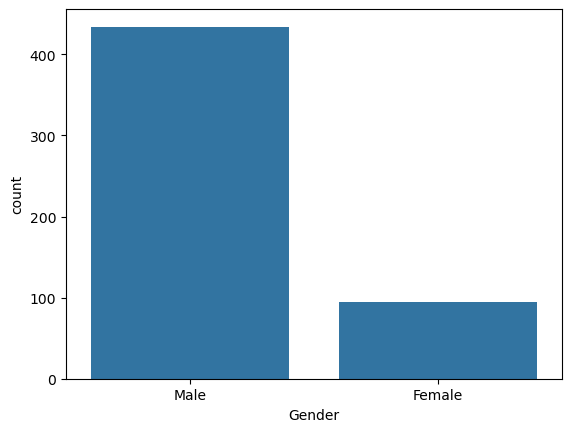

In [47]:
df['Gender'].value_counts()
sns.countplot(x=df['Gender'])

##### Conl: The 85% of Male candidates comes for a loan

<Axes: xlabel='Married', ylabel='count'>

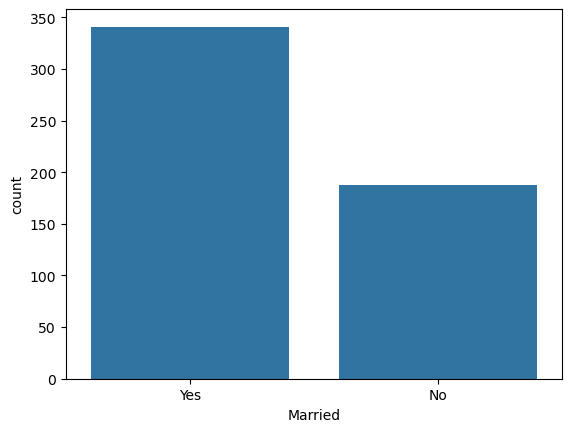

In [48]:
df['Married'].value_counts()
sns.countplot(x=df['Married'])

##### Conl: The 75% of Married People Came for Loan

<Axes: xlabel='Education', ylabel='count'>

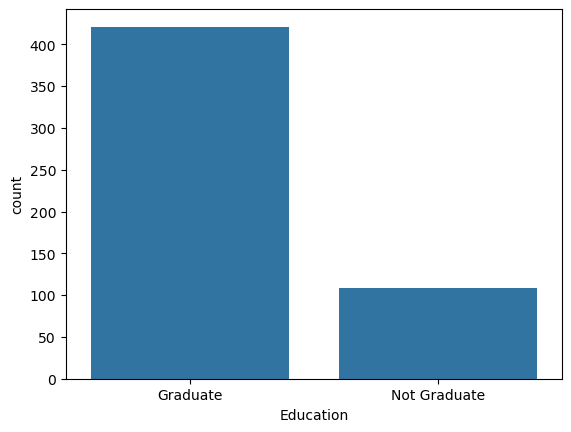

In [49]:
df['Education'].value_counts()
sns.countplot(x=df['Education'])

##### Conl: the 80% percent people are Graduate

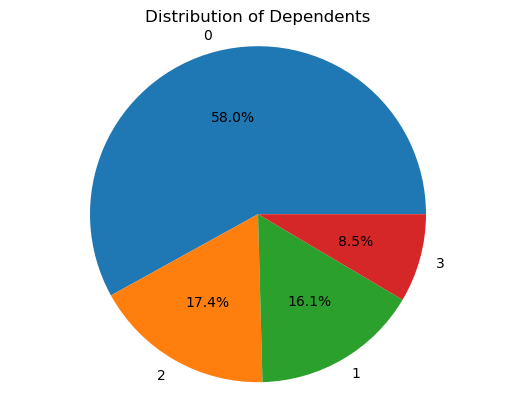

In [50]:
dep_counts = df['Dependents'].value_counts()
plt.pie(dep_counts, labels=dep_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Dependents')
plt.axis('equal')
plt.show()

##### Conl : More than 50% people are Independent

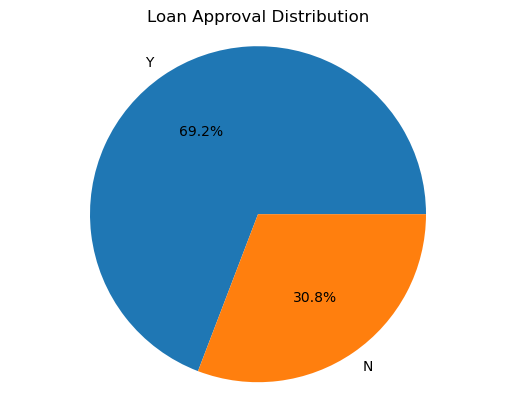

In [51]:
lon_counts = df['Loan_Status'].value_counts()
plt.pie(lon_counts, labels=lon_counts.index, autopct='%1.1f%%')
plt.title('Loan Approval Distribution')
plt.axis('equal')
plt.show()

##### Conl : More than 70% Applicants get Loan

#### Bivariate Analysis

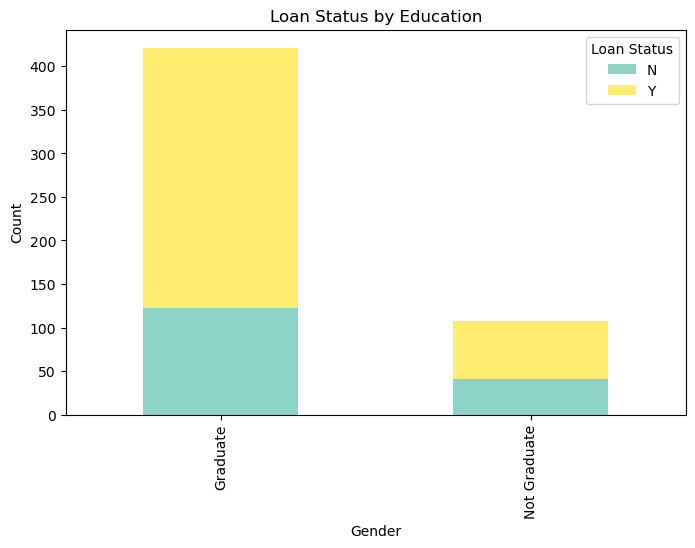

In [52]:
vf = pd.crosstab(df['Education'],df['Loan_Status'])
vf.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set3')
plt.title('Loan Status by Education')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

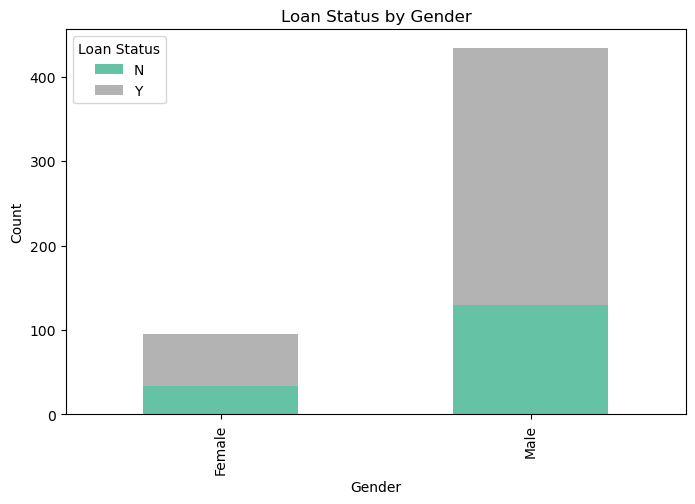

In [53]:
ct = pd.crosstab(df['Gender'],df['Loan_Status'])
ct.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set2')
plt.title('Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [54]:
ed = pd.crosstab(df['Self_Employed'],df['Loan_Status'])
ed

Loan_Status,N,Y
Self_Employed,,
No,139,320
Yes,24,46


Loan_Status      N    Y
Self_Employed          
No             139  320
Yes             24   46


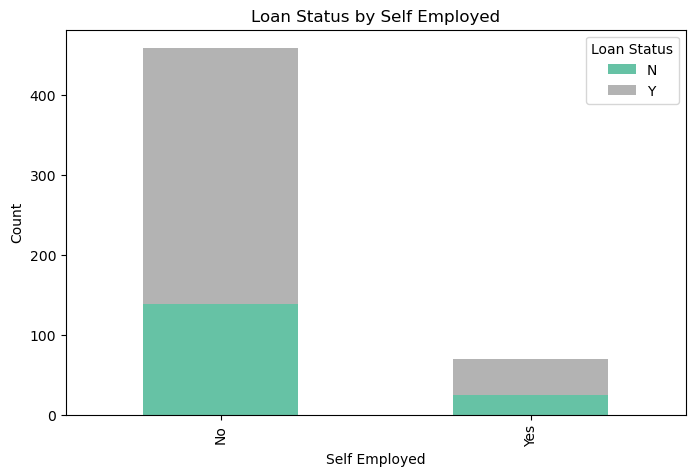

In [55]:
ed = pd.crosstab(df['Self_Employed'],df['Loan_Status'])
print(ed)
ed.plot(kind='bar', stacked=True, figsize=(8,5),colormap='Set2')
plt.title('Loan Status by Self Employed')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [56]:
e = pd.crosstab(df['Credit_History'],df['Loan_Status'])
e

Loan_Status,N,Y
Credit_History,,
NO,72,7
Yes,91,359


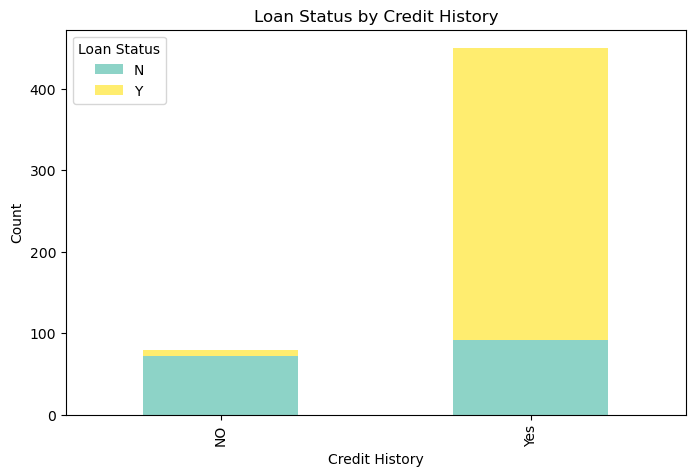

In [57]:
e = pd.crosstab(df['Credit_History'],df['Loan_Status'])
e.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set3')
plt.title('Loan Status by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

##### Conl: Male applicants have a higher loan approval count compared to female applicants.
##### Conl: Graduate Applicants a higher loan approval count compared to Not Graduate
##### Conl: if Applicant is not Self Employed then also his loan Approval Chances Good as compare Self Employed


##### Conl: Applicants with a positive credit history are significantly more likely to have their loans approved compared to those with no credit history.
##### If you Don't have Credit History 90% you will not get a Loan : If you have Credit History be getting high chances of loan

In [58]:
df.groupby('Loan_Status')['LoanAmount'].describe().T

Loan_Status,N,Y
count,163.000000,366.000000
mean,150.466258,143.797814
std,87.048112,82.804292
min,9.000000,17.000000
25%,100.000000,100.250000
50%,128.000000,128.000000
75%,173.000000,161.750000
max,570.000000,700.000000


##### Conl: Not Significance differece in between Loan Approval and Rejected Based on Loan Amount

In [59]:
df.groupby('Loan_Status')['Overall_income'].describe().T

Loan_Status,N,Y
count,163.000000,366.000000
mean,7274.269939,6950.434208
std,7796.001701,5983.541784
min,1442.000000,1963.000000
25%,4087.500000,4188.750000
50%,5230.000000,5416.500000
75%,7491.000000,7548.000000
max,81000.000000,63337.000000


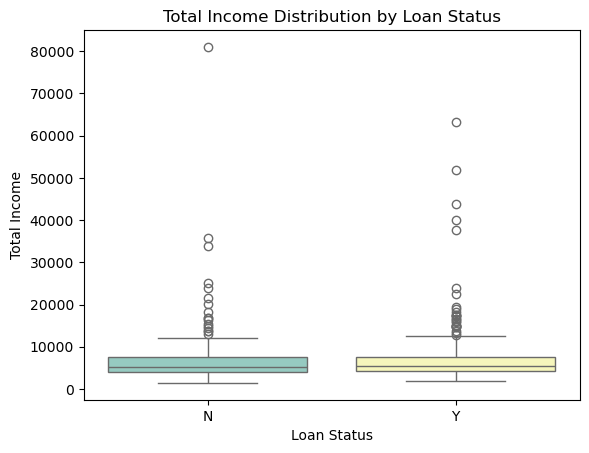

In [60]:
sns.boxplot(data=df, x='Loan_Status', y='Overall_income', palette='Set3')
plt.title('Total Income Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Total Income')
plt.show()

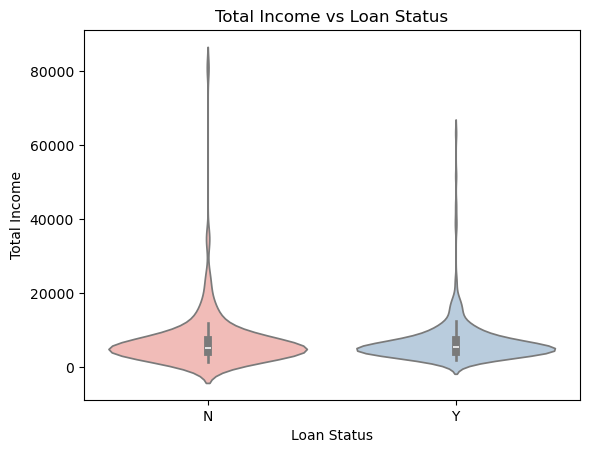

In [61]:
sns.violinplot(data=df, x='Loan_Status', y='Overall_income', palette='Pastel1')
plt.title('Total Income vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Total Income')
plt.show()

##### Conl : These trends suggest that higher loan amounts may be associated with increased risk of rejection

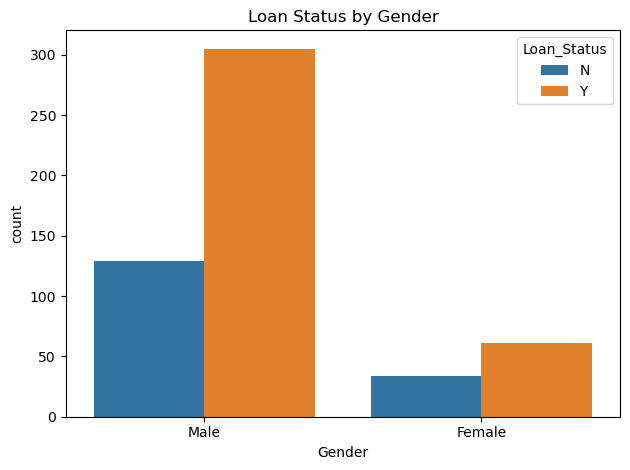

In [62]:
#Loan Status comparision Male and Female
sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.title('Loan Status by Gender')
plt.tight_layout()
plt.show()

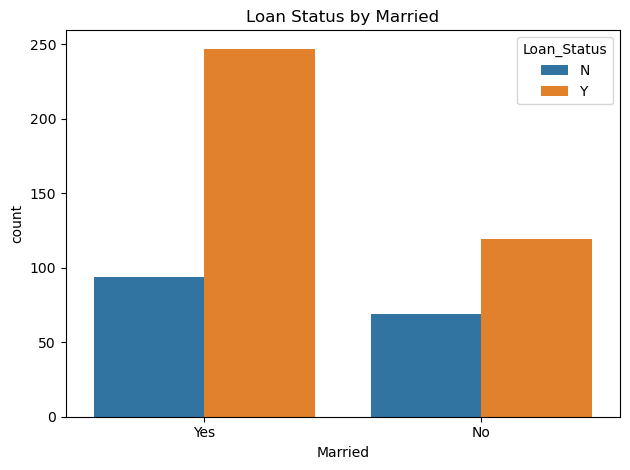

In [63]:
# Loan Status comparision with Married
sns.countplot(x='Married', hue='Loan_Status', data=df)
plt.title('Loan Status by Married')
plt.tight_layout()
plt.show()

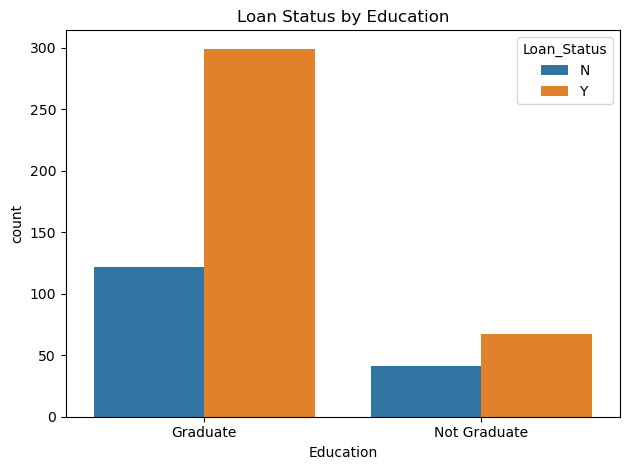

In [64]:
# Loan Status comparision by Gender
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title('Loan Status by Education')
plt.tight_layout()
plt.show()

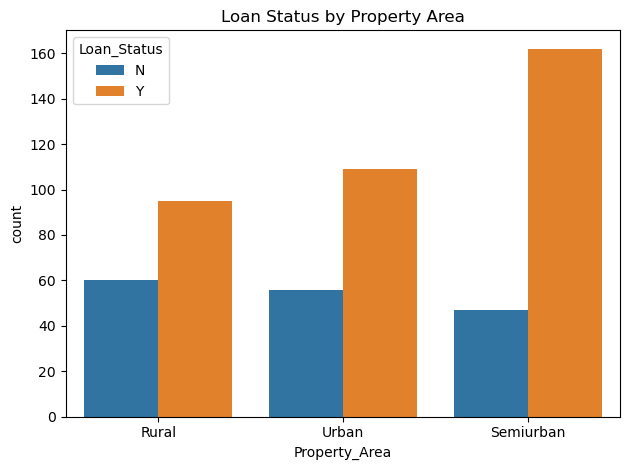

In [65]:
# 11. Property Area vs Loan Status
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title('Loan Status by Property Area')
plt.tight_layout()
plt.show()

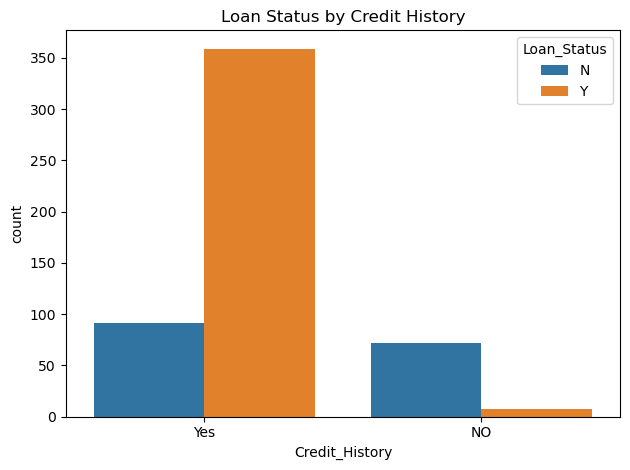

In [66]:
#10. Credit History vs Loan Status
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title('Loan Status by Credit History')
plt.tight_layout()
plt.show()

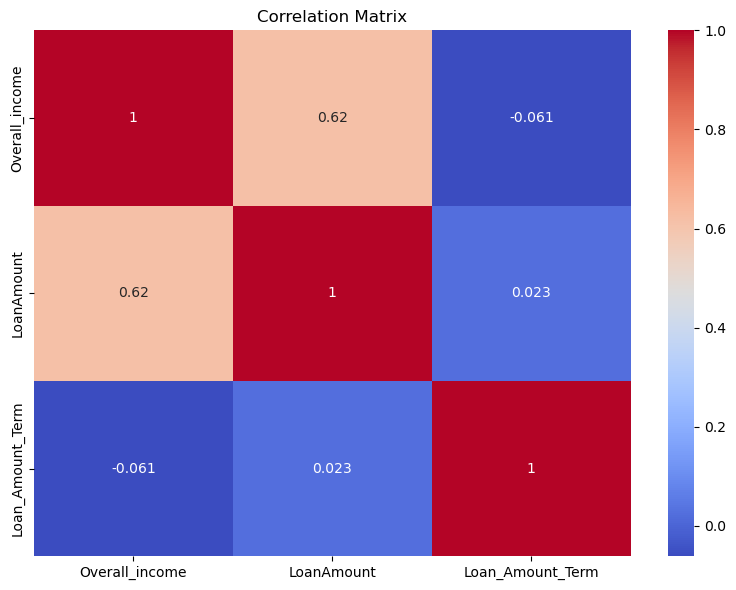

In [67]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Overall_income','LoanAmount','Loan_Amount_Term']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

##### conl: This means that applicants with higher total income (from both applicant and co-applicant) are generally given higher loan amounts.
##### -On the other hand, Loan Amount Term (the duration of the loan) does not show a strong relationship with either income or loan amount. 

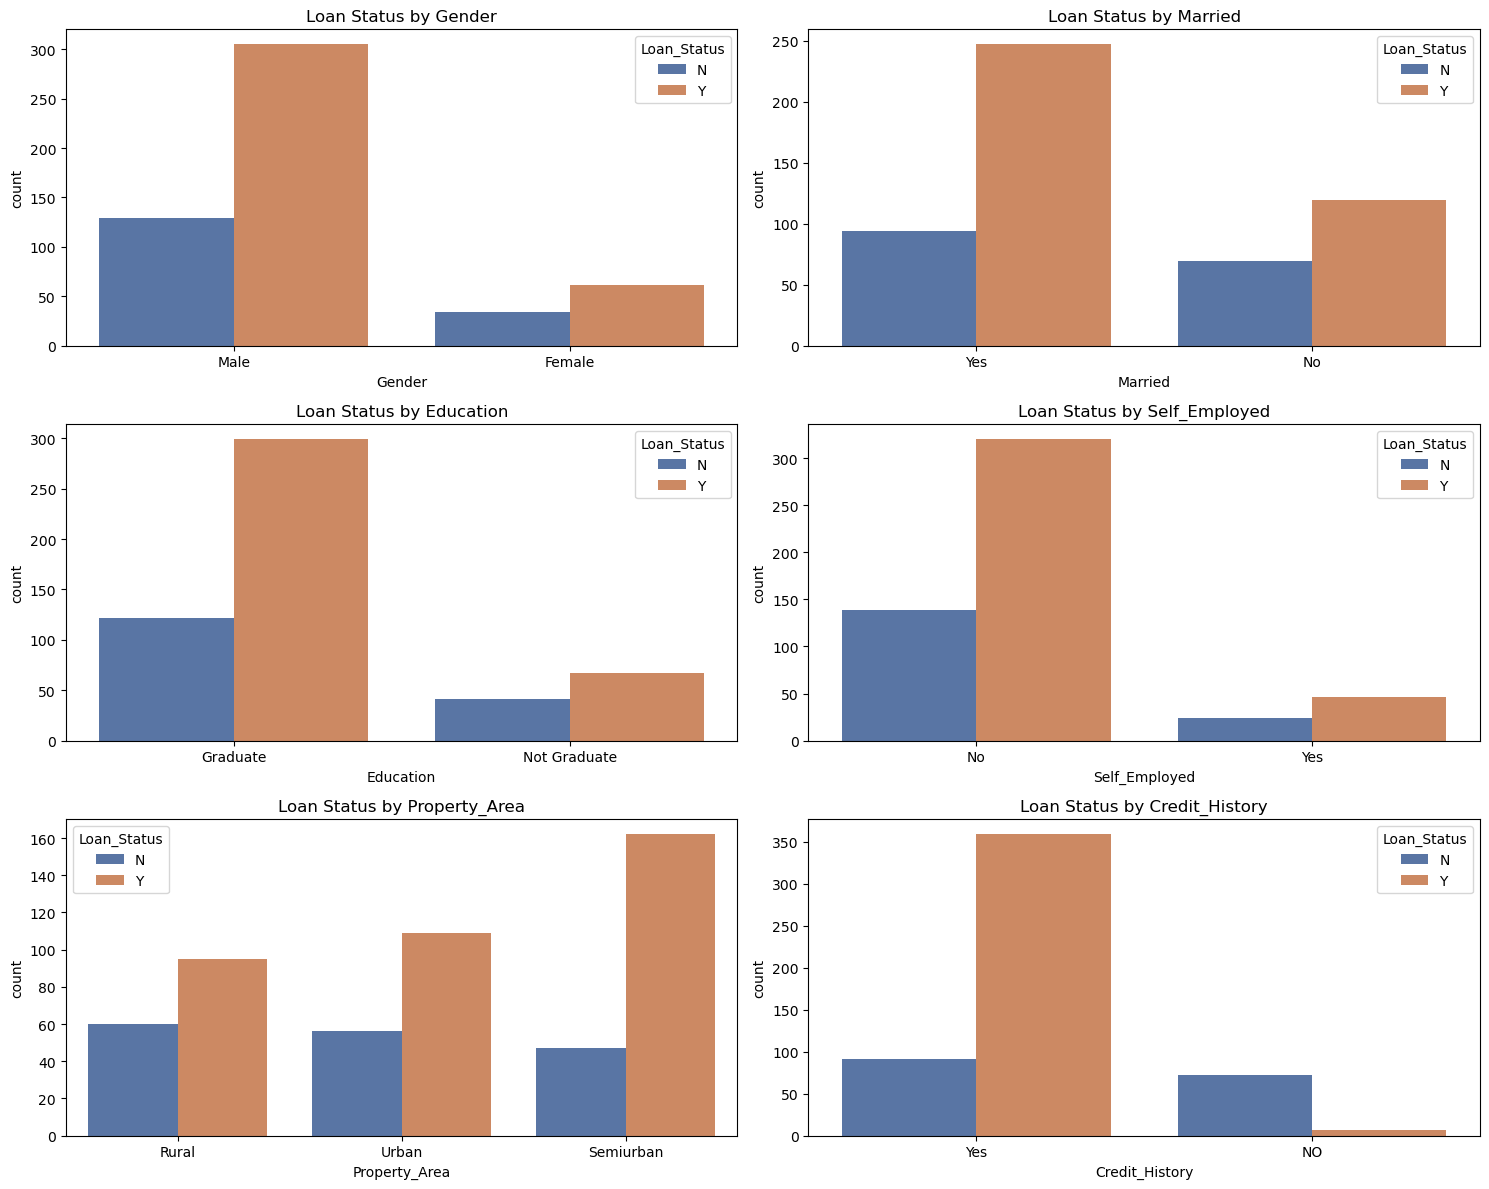

In [68]:
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']

plt.figure(figsize=(15, 12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, hue='Loan_Status', data=df, palette='deep')
    plt.title(f'Loan Status by {col}')
    plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Income Distribution by Loan Status')

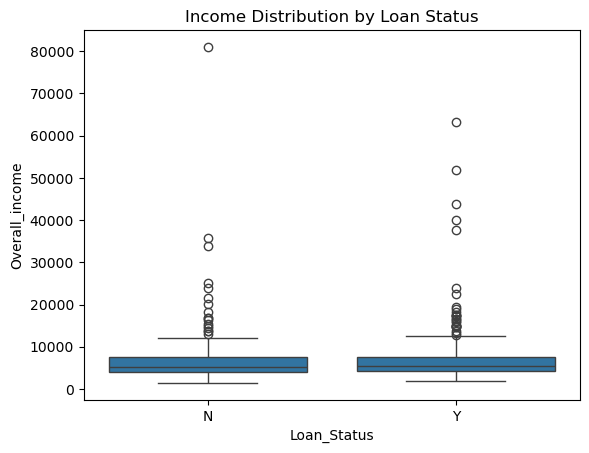

In [69]:
sns.boxplot(data=df, x='Loan_Status', y='Overall_income')
plt.title('Income Distribution by Loan Status')

#### Conl: Interestingly, higher income doesn't always guarantee approval. Outliers and skewed distributions play a big role.

# Conclusion Key Takeaways:

#### 1. Credit history is the single most influential factor in loan approvals.

#### 2. Income-to-loan ratio is more informative than raw income alone.

#### 3. Applicants from urban/semiurban areas have higher approval rates.

#### 4. Married and graduate applicants also showed better chances.

#### 5. Interestingly, higher income doesn't always guarantee approval.

#### 6. Male applicants had a higher loan approval count compared to female applicants.

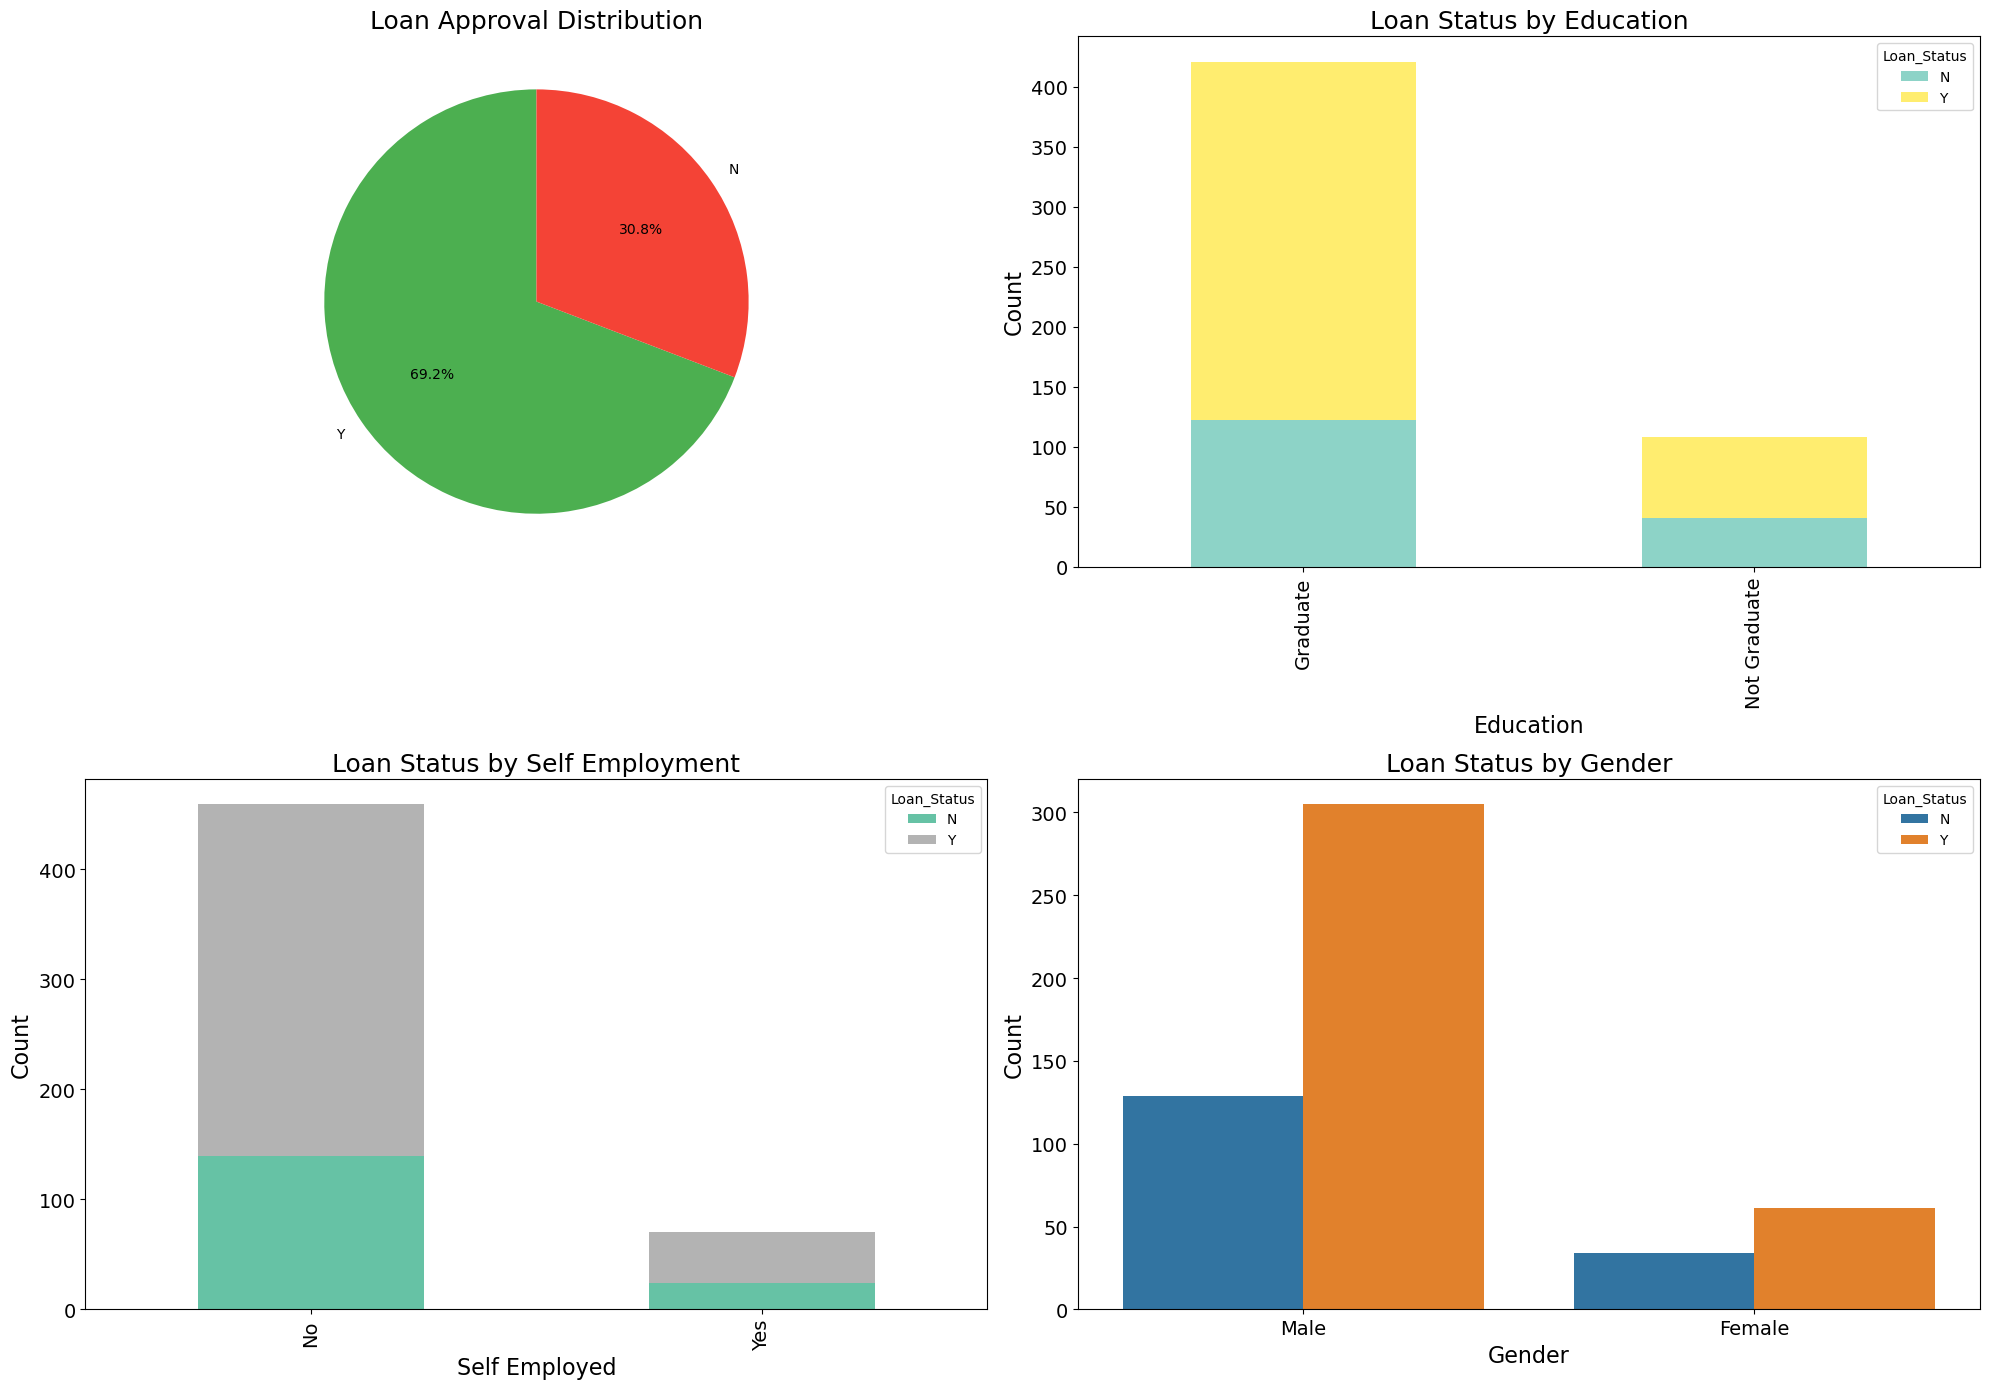

In [70]:
loan_counts = df['Loan_Status'].value_counts()
edu_ct = pd.crosstab(df['Education'], df['Loan_Status'])
emp_ct = pd.crosstab(df['Self_Employed'], df['Loan_Status'])

# Create 2x2 subplot layout with larger size and fonts
fig, axes = plt.subplots(2, 2, figsize=(20, 14))  # Larger figure

# Plot 1: Pie chart
axes[0, 0].pie(loan_counts, labels=loan_counts.index, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336'])
axes[0, 0].set_title('Loan Approval Distribution', fontsize=18)

# Plot 2: Education vs Loan Status
edu_ct.plot(kind='bar', stacked=True, colormap='Set3', ax=axes[0, 1])
axes[0, 1].set_title('Loan Status by Education', fontsize=18)
axes[0, 1].set_xlabel('Education', fontsize=16)
axes[0, 1].set_ylabel('Count', fontsize=16)
axes[0, 1].tick_params(axis='x', labelsize=14)
axes[0, 1].tick_params(axis='y', labelsize=14)

# Plot 3: Self Employed vs Loan Status
emp_ct.plot(kind='bar', stacked=True, colormap='Set2', ax=axes[1, 0])
axes[1, 0].set_title('Loan Status by Self Employment', fontsize=18)
axes[1, 0].set_xlabel('Self Employed', fontsize=16)
axes[1, 0].set_ylabel('Count', fontsize=16)
axes[1, 0].tick_params(axis='x', labelsize=14)
axes[1, 0].tick_params(axis='y', labelsize=14)

# Plot 4: Gender vs Loan Status
sns.countplot(data=df, x='Gender', hue='Loan_Status', ax=axes[1, 1])
axes[1, 1].set_title('Loan Status by Gender', fontsize=18)
axes[1, 1].set_xlabel('Gender', fontsize=16)
axes[1, 1].set_ylabel('Count', fontsize=16)
axes[1, 1].tick_params(axis='x', labelsize=14)
axes[1, 1].tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.savefig('loan_dashboard_part1_big.png', dpi=300)
plt.show()


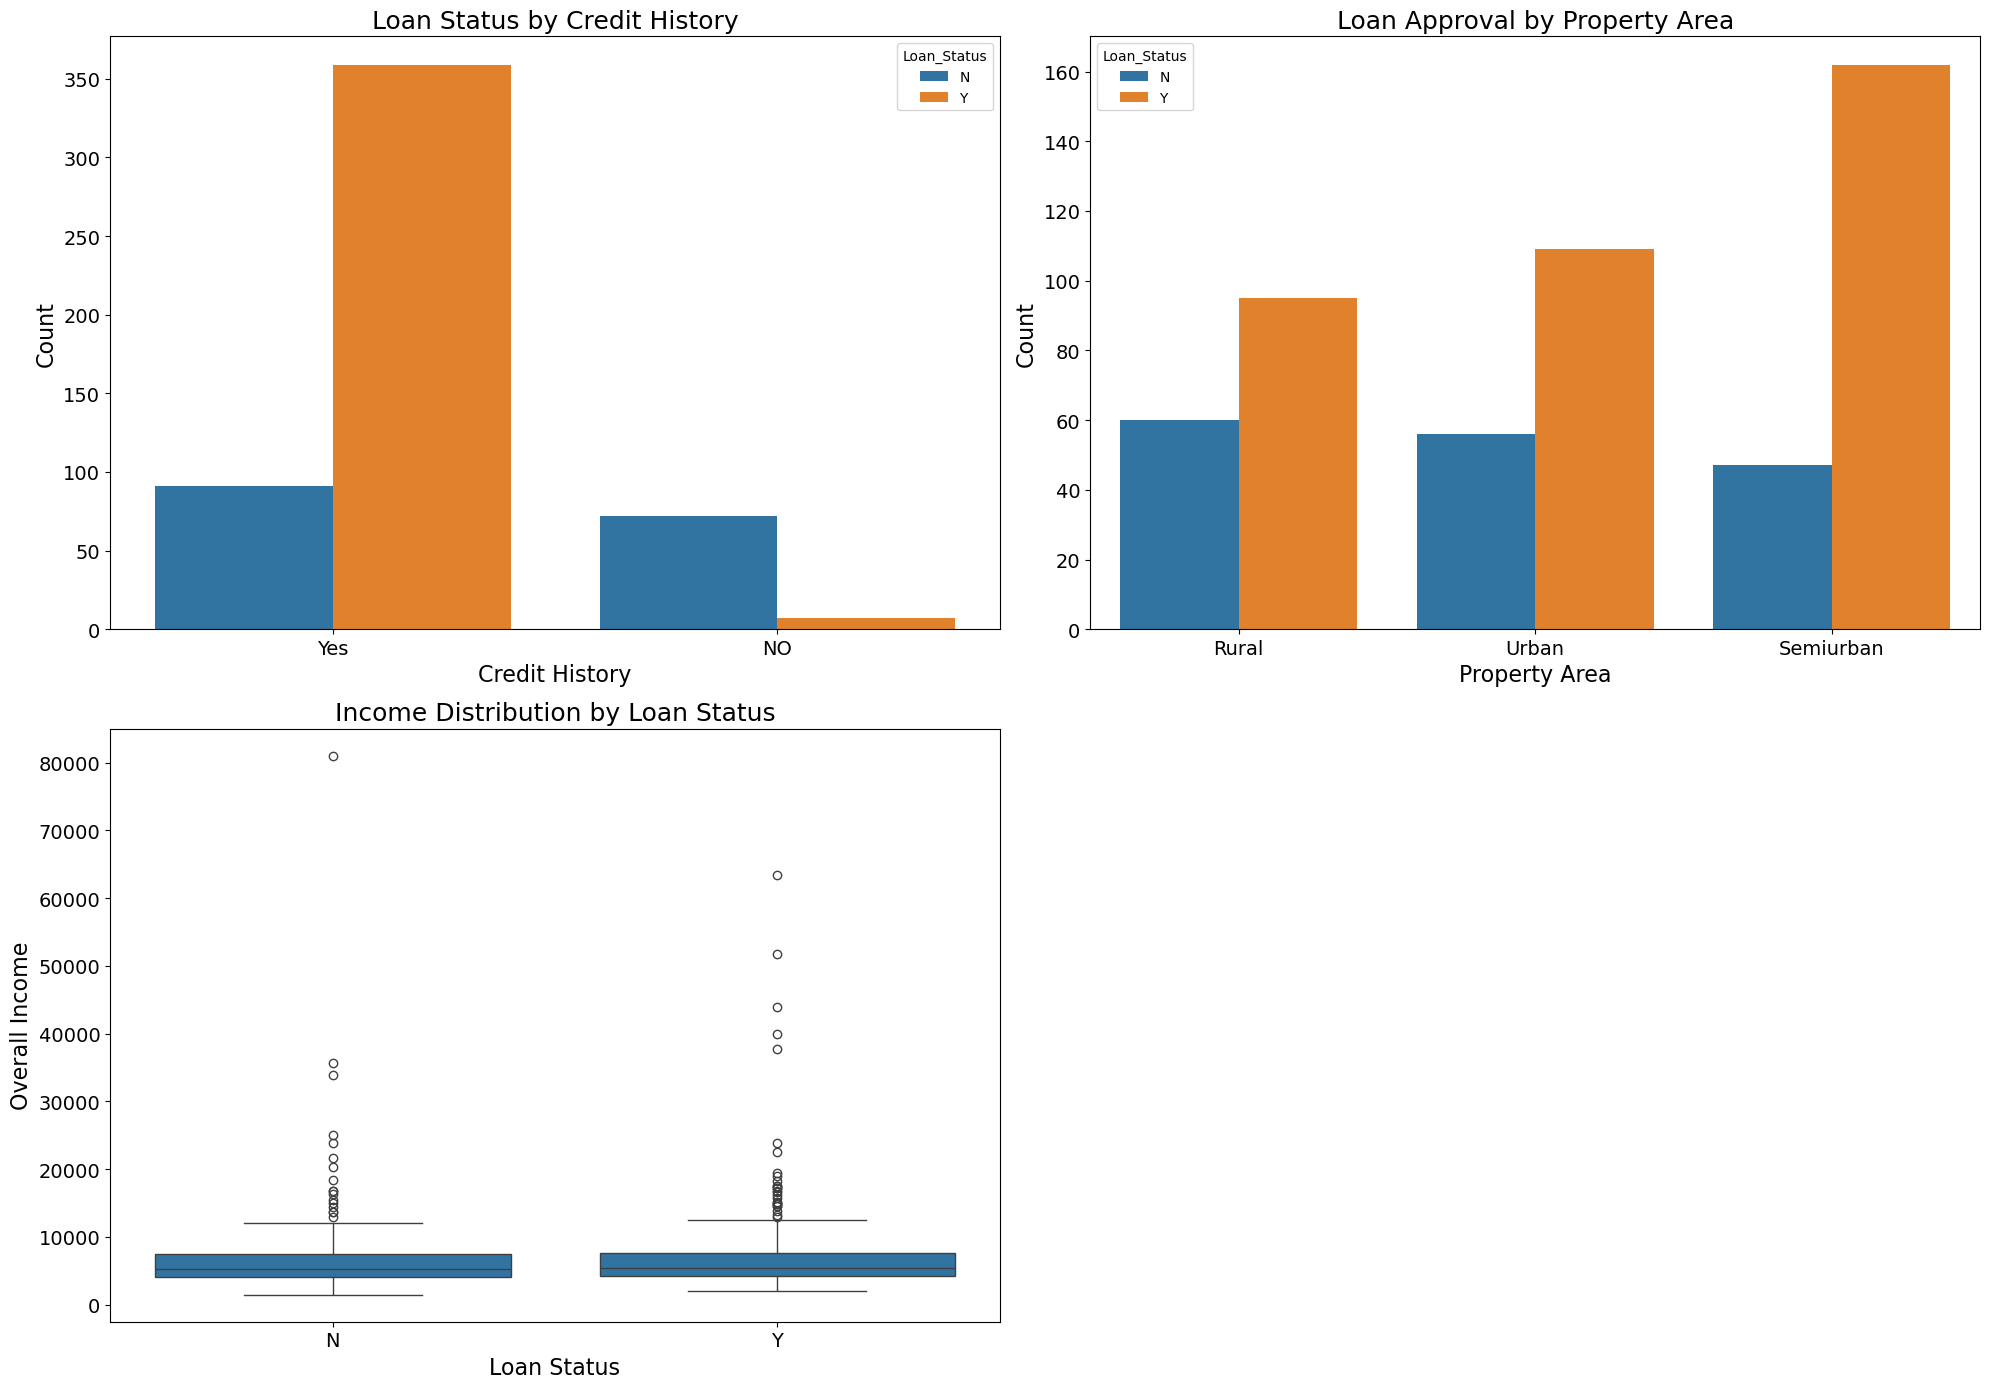

In [71]:
# Create 2x2 layout with 3 plots and 1 empty
fig, axes = plt.subplots(2, 2, figsize=(20, 14))

# Plot 1: Credit History vs Loan Status
sns.countplot(data=df, x='Credit_History', hue='Loan_Status', ax=axes[0, 0])
axes[0, 0].set_title('Loan Status by Credit History', fontsize=18)
axes[0, 0].set_xlabel('Credit History', fontsize=16)
axes[0, 0].set_ylabel('Count', fontsize=16)
axes[0, 0].tick_params(axis='x', labelsize=14)
axes[0, 0].tick_params(axis='y', labelsize=14)

# Plot 2: Property Area vs Loan Status
sns.countplot(data=df, x='Property_Area', hue='Loan_Status', ax=axes[0, 1])
axes[0, 1].set_title('Loan Approval by Property Area', fontsize=18)
axes[0, 1].set_xlabel('Property Area', fontsize=16)
axes[0, 1].set_ylabel('Count', fontsize=16)
axes[0, 1].tick_params(axis='x', labelsize=14)
axes[0, 1].tick_params(axis='y', labelsize=14)

# Plot 3: Boxplot of Overall Income by Loan Status
sns.boxplot(data=df, x='Loan_Status', y='Overall_income', ax=axes[1, 0])
axes[1, 0].set_title('Income Distribution by Loan Status', fontsize=18)
axes[1, 0].set_xlabel('Loan Status', fontsize=16)
axes[1, 0].set_ylabel('Overall Income', fontsize=16)
axes[1, 0].tick_params(axis='x', labelsize=14)
axes[1, 0].tick_params(axis='y', labelsize=14)

# Hide empty plot
axes[1, 1].axis('off')

plt.tight_layout()
plt.savefig('loan_dashboard_part2_big.png', dpi=300)
plt.show()


In [72]:
from PIL import Image, ImageDraw, ImageFont
import textwrap

lines = [
    "Conclusion & Key Takeaways",
    "",
    "1. Credit history is the most influential factor in loan approvals.",
    "2. The income-to-loan ratio is more predictive than raw income alone.",
    "3. Applicants from urban and semiurban areas tend to have higher approval rates.",
    "4. Married and graduate applicants show better loan approval chances.",
    "5. Surprisingly, higher income doesn't always guarantee approval.",
    "6. Male applicants received more approvals compared to female applicants."
]

# Image settings
width = 1600
padding = 60
line_spacing = 20       
font_size = 36
bg_color = "white"
text_color = "black"
font_path = "arial.ttf"

try:
    font = ImageFont.truetype(font_path, font_size)
except:
    from PIL import ImageFont
    font = ImageFont.load_default()

# Calculate height based on number of lines
height = padding * 2 + len(lines) * (font_size + line_spacing)

image = Image.new("RGB", (width, height), color=bg_color)
draw = ImageDraw.Draw(image)


y = padding
for line in lines:
    draw.text((padding, y), line, font=font, fill=text_color)
    y += font_size + line_spacing

# Save and show image
image.save("loan_project_takeaways.png")
image.show()